# Python Intermediate: Iteration and Visualization

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Implement loops to do repeated computations.
* Understand how to implement loops in Pandas with a technique called "vectorization".
* Apply several Pandas methods to summarize and manipulate data.
* Distinguish Pandas methods for `DataFrame` and `Series` objects.
* Create simple visualizations using Pandas. 
    
</div>


### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive exercise. We'll work through these in the workshop!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
📝 **Poll:** A Zoom poll to help you learn!

### Sections
1. [Iteration: Loops](#iter)
2. [Iteration: Vectorization](#vector)
3. [Methods for `DataFrame` Objects](#df_meth)
4. [Methods for `Series` Objects](#series_meth)

<a id='iter'></a>

# Iteration: Loops

The strength of using computers is their speed. We can leverage this through repeated computation, also called iteration. In Python, we can do this using **loops**. 

A **[for loop](https://www.w3schools.com/python/python_for_loops.asp)** executes some statements once *for* each value in an iterable (like a list or a string). It says: "*for* each thing in this group, *do* these operations".

Let's take a look at the syntax of a for loop using the above example:

In [1]:
# We use a variable containing a list with the values to be iterated through
lifeExp_list = [28.801, 30.332, 31.997]

# Initialize the loop
for lifeExp in lifeExp_list:
    rounded = round(lifeExp)
    print(rounded)

# This will only be printed when the loop has ended!
print('The loop has ended.')

29
30
32
The loop has ended.


Note that the above example is pretty easy to read:

"**for** each number **in** our list, print out the rounded number".

## For Loop Syntax

Let's break down the syntax of the `for` loop more closely.

<img src="../images/for.png" alt="For loop in Python" width="700"/>

Pay attention to the **loop variable** (`lifeExp`). It stands for each item in the list (`lifeExp_list`) we are iterating through. Loop variables can have any name; if we'd change it to `x`, it would still work. However, loop variables only exist inside the loop.

🔔 **Question**: Would you prefer `lifeExp` or `x` as a name for the loop variable? Why?

## 🥊 Challenge 1: Fixing Loop Syntax

The following block of code contains **three errors** that are preventing it from running properly. 

📝 **Poll PyInt 2-1:** What are the three errors?

In [2]:
for number in [2.12, 3.432, 5.23]:
    print(number)

2.12
3.432
5.23


## Loops With Strings

Loops can loop over any iterable data type. An **iterable** is any data type that can be iterated over, like a sequence. Generally, anything that can be indexed (e.g. accessed with `values[i]`) is an iterable.

For example, a string is iterable, so it is possible to loop through a string!

Let's take a look at an example:

In [3]:
example_string = 'afghanistan'

for char in example_string:
    # Use the upper() method on char
    print(char.upper())

A
F
G
H
A
N
I
S
T
A
N


## Conditionals and Loops

Recall that we can use `if`-statements to check if a condition is `True` or `False`. Also recall that `True` and `False` are called **Boolean values**.

Conditionals are particularly useful when we're iterating through a list, and want to perform some operation only on specific components of that list that satisfy a certain condition.

In [4]:
numbers = [12, 20.2, 43, 88.88, 97, 100, 105, 110.9167]

for number in numbers:
    if number > 100:
        print(number, 'is greater than 100.')

105 is greater than 100.
110.9167 is greater than 100.


## Aggregating Values With Loops

In the above example, we are operating on each value in `numbers`. However, instead of simply printing the results, we often will want to save them somehow. We can do this with an **accumulator variable**.

A common strategy in programs is to:
1.  Initialize an accumulator variable appropriate to the datatype of the output:
    * `int` : `0`
    * `str` : `''`
    * `list` : `[]`
2.  Update the variable with values from a collection through a `for` loop. Typical update operations are:
    * `int` : `+`
    * `str` : `+`
    * `list` : `.append()`
    
The result of this is a single list, number, or string with a summary value for the entire collection being looped over.

We can make a new list with all of the rounded numbers:

In [5]:
rounded_numbers = []

for number in numbers: 
    rounded = round(number)
    rounded_numbers.append(rounded)

print('Rounded numbers:', rounded_numbers)

Rounded numbers: [12, 20, 43, 89, 97, 100, 105, 111]


## 🥊 Challenge 2: Aggregation Practice

Below are a few examples showing the different types of quantities you might aggregate using a for loop. These loops are partially filled out. Finish them and test that they work!

1. Find the total length of the strings in the given list. Store this quantity in a variable called `total`.

In [6]:
total = 0
words = ['red', 'green', 'blue']

for w in words:
    total = total + len(w)

print(total)

12


2. Find the length of each word in the list, and store these lengths in another list called `lengths`.

In [7]:
lengths = []
words = ['red', 'green', 'blue']

for w in words:
    lengths.append(len(w))

print(lengths)

[3, 5, 4]


3. Concatenate all words into a single string called `result`.

In [8]:
words = ['red', 'green', 'blue']
result = ''

for w in words:
    result += w

print(result)

redgreenblue


💡 **Tip**: You might also encounter **[while loops](https://www.w3schools.com/python/python_while_loops.asp)**. A while loop says: "*while* Condition A is true, *do* these operations". We don't use these loops frequently in this type of programming so we won't cover them here.

<a id='vector'></a>

# Iteration: Vectorization

Let's have a look at our Gapminder dataset.

In [9]:
import pandas as pd

df = pd.read_csv('../data/gapminder_gni.csv')
df.head()

,country,year,pop,continent,lifeExp,gdpPercap,gniPercap
0,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,NaN
1,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,NaN
2,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,NaN
3,Afghanistan,1977,14880372.0,Asia,38.438,786.113360,NaN
4,Afghanistan,1982,12881816.0,Asia,39.854,978.011439,NaN


Let's say that we want to multiply GDP per capita (`gdpPercap`) by population (`pop`) in order to get the total GDP of a country. We could do so using a `for` loop:

In [12]:
gdpTotal = []
df_length = len(df)

for each in range(df_length):
    gdp = df['gdpPercap'][each]
    pop = df['pop'][each]
    gdpTotal.append(gdp * pop)
    
gdpTotal[:5]

[8758855796.92893,
 9648014149.848902,
 9678553274.066868,
 11697659230.96992,
 12598563400.516861]

But this operation is convoluted, slow, and not preferred. In Pandas, we will want to use [**vectorized**](https://www.geeksforgeeks.org/vectorized-operations-in-numpy) operations. 

We can just multiply two columns, and Pandas will know we want to multiply each row of both columns!

In [13]:
gdpTotal = df['gdpPercap'] * df['pop']
gdpTotal[:5]

0    8.758856e+09
1    9.648014e+09
2    9.678553e+09
3    1.169766e+10
4    1.259856e+10
dtype: float64

Here's what's happening to our DataFrame when we perform that operation:

<img src="../images/vectorized2.png" alt="Vectorizing in Pandas – multiplying columns" width="600"/>

⚠️ **Warning:** Note that the output to this operation is not a list, but a `Series` – a data type specific to Pandas. It is like a list, but it is **labeled**. 

Vectorized operations like these are really handy, and they replace most of the use of `for`-loops in a context of Pandas and data analysis.

## 🥊 Challenge 3: Get Vectorized

Say our `year` column contains wrong information and we need to add one year to each value. Use a vectorized operation to get this done.

In [15]:
# YOUR CODE HERE
df['year'] = df['year'] + 1
df.head

<bound method NDFrame.head of           country  year         pop continent  lifeExp   gdpPercap  gniPercap
0     Afghanistan  1964  10267083.0      Asia   31.997  853.100710        NaN
1     Afghanistan  1969  11537966.0      Asia   34.020  836.197138        NaN
2     Afghanistan  1974  13079460.0      Asia   36.088  739.981106        NaN
3     Afghanistan  1979  14880372.0      Asia   38.438  786.113360        NaN
4     Afghanistan  1984  12881816.0      Asia   39.854  978.011439        NaN
...           ...   ...         ...       ...      ...         ...        ...
1315     Zimbabwe  1989   9216418.0    Africa   62.351  706.157306      810.0
1316     Zimbabwe  1994  10704340.0    Africa   60.377  693.420786      640.0
1317     Zimbabwe  1999  11404948.0    Africa   46.809  792.449960      620.0
1318     Zimbabwe  2004  11926563.0    Africa   39.989  672.038623      440.0
1319     Zimbabwe  2009  12311143.0    Africa   43.487  469.709298      330.0

[1320 rows x 7 columns]>

<a id='df_meth'></a>

# Methods for `DataFrame` Objects

Pandas has many methods: some allow you to work with entire DataFrames, while others operate on individual columns. This section focuses on learning to distinguish between these methods.

Some methods work on entire DataFrames. We can look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) to see all the methods and attributes that are available for `DataFrame` objects. Learning how to read documentation is an important skill! 

## Summary Statistics
The [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) method will give some summary statistics for a `DataFrame`. Run the cell below to see how it works.

In [16]:
df.describe()

,year,pop,lifeExp,gdpPercap,gniPercap
count,1320.00000,1.320000e+03,1320.000000,1320.000000,1010.000000
mean,1986.50000,3.335027e+07,61.305435,7979.960449,5054.601980
std,14.36685,1.168342e+08,12.281896,9934.968078,9882.803653
min,1964.00000,6.534500e+04,23.599000,347.000000,10.000000
25%,1974.00000,3.217658e+06,50.650750,1243.424350,342.500000
50%,1986.50000,7.771127e+06,63.354500,4167.283149,1075.000000
75%,1999.00000,2.104751e+07,71.664750,10921.893205,4030.000000
max,2009.00000,1.318683e+09,82.603000,109347.867000,87500.000000


📝 **Poll PyInt 2-2:**  Why are only some of the columns in the `DataFrame` visible in the output?

## 🥊 Challenge 4: Check the Data Type

What is the data type of the output of `describe()`?

In [18]:
# YOUR CODE HERE
type(df.describe())

pandas.core.frame.DataFrame

## Scatter Plots

Pandas has a convenient [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) method that allows you to create different kinds of visualizations. Some of these visualizations can be called on a DataFrame object.

For instance, **scatter plots** visualize the relationship between different variables (columns) in a DataFrame. This is why we run the method on an entire DataFrame.

We can create a scatter `plot()` by specifying the columns to use for the `x` and `y` axes. 

<Axes: xlabel='lifeExp', ylabel='gdpPercap'>

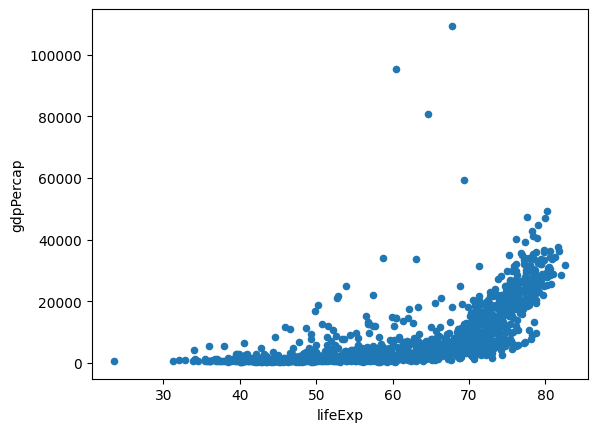

In [19]:
df.plot(kind='scatter', x='lifeExp', y='gdpPercap')

## Sorting Values

Let's say we want to find the countries with the highest `gdpPercap`.

If we want to sort the values in a DataFrame we can use the [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) method on a DataFrame. It takes as an argument the column we want to sort the DataFrame on. 

⚠️ **Warning:** By default, `sort_values()` sorts in **ascending order**.

In [25]:

df.sort_values('gdpPercap')

,country,year,pop,continent,lifeExp,gdpPercap,gniPercap
826,Myanmar,1994,40546538.0,Asia,59.320,347.000000,60.0
821,Myanmar,1969,25870271.0,Asia,49.379,349.000000,10.0
170,Burundi,1964,2961915.0,Africa,42.045,355.203227,80.0
822,Myanmar,1974,28466390.0,Asia,53.070,357.000000,20.0
823,Myanmar,1979,31528087.0,Asia,56.059,371.000000,30.0
...,...,...,...,...,...,...,...
909,Norway,2009,4627926.0,Europe,80.196,49357.190170,87500.0
663,Kuwait,1979,1140357.0,Asia,69.343,59265.477140,NaN
661,Kuwait,1969,575003.0,Asia,64.624,80894.883260,NaN
660,Kuwait,1964,358266.0,Asia,60.470,95458.111760,NaN


🔔 **Question:** Add the argument `ascending=False` when running `sort_values()` in the cell above. What happens?

## Bar Plots

Bar plots show the relationship between a numeric and a categoric variable. Here, we use the `country` (categorical) and `lifeExp` (numeric) columns. Use a bar plot when you want to illustrate differences in frequencies of some category.

In the below cell, we retrieve the 10 data points with the **lowest life expectancy** in our data using the `sort_values()` method, and then plot those data points in a bar plot.

💡 **Tip**: Note that `plot.bar()` is a method of its own, and is an alternative to using `plot()` with the `type=bar` argument.

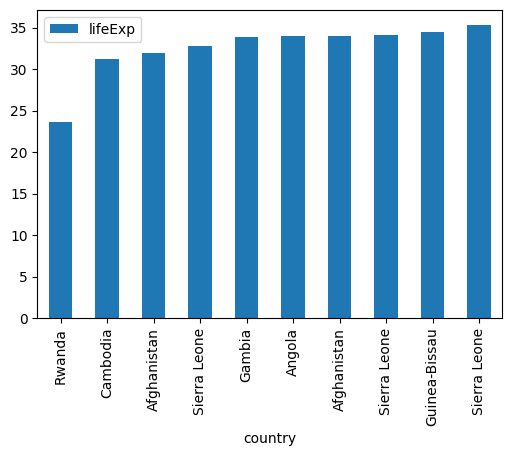

In [26]:
# Sort values based on low life expectancy, get top 10
low_lifeExp = df.sort_values('lifeExp', ascending=True)[:10]

# Visualize with bar plot 
low_lifeExp.plot.bar(x='country', y='lifeExp', figsize=(6,4));

<a id='series_meth'></a>

# Methods for `Series` Objects

Some Pandas methods work on `Series` objects – single columns – instead of entire DataFrames.

For instance, what if we wanted to calculate the median of life expectancy? We'd need to select just one column to operate on. 

Recall that we can select an individual column with bracket notation. This is analogous to indexing a list.

🔔 **Question**: What is the type of the output of the below cell?

In [27]:
df['lifeExp']

0       31.997
1       34.020
2       36.088
3       38.438
4       39.854
         ...  
1315    62.351
1316    60.377
1317    46.809
1318    39.989
1319    43.487
Name: lifeExp, Length: 1320, dtype: float64

A single column of pandas is a `Series` object. This can be treated as a list or other iterable, and allows for you to do calculations over it. 

We can look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) to see the methods and attributes that are available for `Series` objects. If we want the median, we can use the `median()` function.

In [28]:
df['lifeExp'].median()

63.3545

## Counting Values

There are many methods for summarizing DataFrames (which often are assigned as `df`). For instance, `value_counts()` returns a `Series` containing counts of unique values.

In [29]:
df.value_counts()

country   year  pop         continent  lifeExp  gdpPercap     gniPercap
Albania   1989  3075321.0   Europe     72.000   3738.932735   730.0        1
Nigeria   1989  81551520.0  Africa     46.886   1385.029563   680.0        1
Niger     1974  5060262.0   Africa     40.546   954.209236    160.0        1
          1979  5682086.0   Africa     41.291   808.897073    280.0        1
          1984  6437188.0   Africa     42.598   909.722135    290.0        1
                                                                          ..
Gambia    1999  1235767.0   Africa     55.861   653.730170    660.0        1
          2004  1457766.0   Africa     58.041   660.585600    390.0        1
          2009  1688359.0   Africa     59.448   752.749726    810.0        1
Germany   1974  78717088.0  Europe     71.000   18016.180270  4670.0       1
Zimbabwe  2009  12311143.0  Africa     43.487   469.709298    330.0        1
Name: count, Length: 1010, dtype: int64

However, `value_counts()` also works on a single column!

In [30]:
df['lifeExp'].value_counts()

lifeExp
71.080    3
73.680    3
78.770    3
70.750    3
76.420    3
         ..
52.790    1
48.690    1
44.598    1
40.489    1
43.487    1
Name: count, Length: 1271, dtype: int64

## Histograms

A histogram shows the distribution of a variable using binned values. We can call this using the syntax: `df[column].plot(kind='hist')`. Use a histogram if you want to show distributions of continuous variables.

📝 **Poll PyInt 2-3:** Try changing the value for the `bins` parameter. What does the `bins` parameter seem to be determining?</span>

<Axes: title={'center': 'Histogram of life expectancy'}, ylabel='Frequency'>

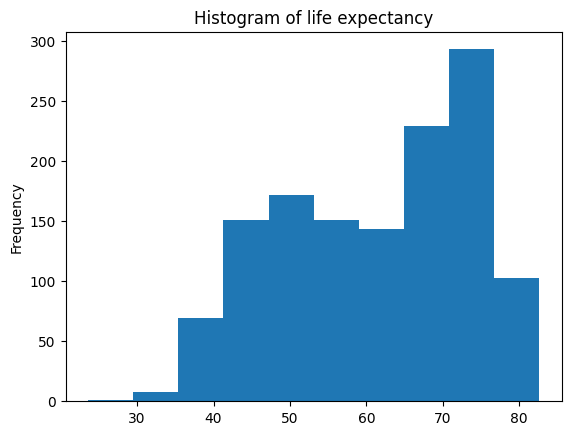

In [34]:
df['lifeExp'].plot(kind='hist', title='Histogram of life expectancy', bins=10)

## 🥊 Challenge 5: Loops and Plots

Let's say you have a list of countries you want to compare life expectancy for, using a single lineplot. We will create a function for this.

We have set up the list and function for you. Your goal is to:
1. Add three country names in the DataFrame to `country_list`.
2. Add two parameters to the function; one for a DataFrame, and one for the list of countries.
3. Within the function block, loop over the list of countries. 
4. Within the for-loop, add the loop variable you named in step 3.
5. In the `label=` parameter of `plt.plot()`, fill in the loop variable name as well.

Run the cell when you're done: if you've succeeded, you should see a single line plot with life expectancy for all of the countries in `country_list`.

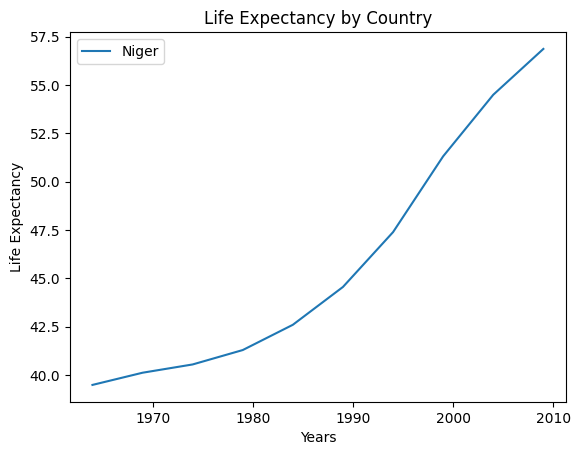

In [50]:
import matplotlib.pyplot as plt

# YOUR CODE HERE

country_list = ['Niger']

def plot_life_expectancy(df,countries):
    for country in countries:
        country_data = df[df['country'] == country]
        plt.plot(country_data['year'], country_data['lifeExp'], label=country)
    plt.xlabel('Years')
    plt.ylabel('Life Expectancy')
    plt.title('Life Expectancy by Country')
    plt.legend()
    plt.show()

plot_life_expectancy(df, country_list)

💡 **Tip**: If you have time left, try to add labels and title to the plot using  `plt.xlabel()`, `plt.ylabel()`, and `plt.title()`. See [this resource](https://www.w3schools.com/python/matplotlib_labels.asp) for more information!

<div class="alert alert-success">

## ❗ Key Points

* `for` loops work on lists and other list-like structures, but also on other iterables such as strings.
* We typically use an accumulator variable to store some information we retrieve using a `for` loop.    
* We typically do not use for-loops in Pandas - instead, we use "vectorized" operations.
* Pandas methods work on either `DataFrame` or `Series` objects--make sure you know which!
* Pandas methods yield as output either `DataFrame` or `Series` objects--make sure you know which!

</div>